In [99]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Some sklearn libraries 

In [100]:
gov_data = pd.read_csv('data/government_effectiveness.csv', parse_dates=['Year'])

In [101]:
gov_data.head(3)

,Year,Country Name,Government Effectiveness: Estimate,Government Effectiveness: Number of Sources,Government Effectiveness: Percentile Rank,"Government Effectiveness: Percentile Rank, Lower Bound of 90% Confidence Interval","Government Effectiveness: Percentile Rank, Upper Bound of 90% Confidence Interval",Government Effectiveness: Standard Error
0,1996-01-01,Afghanistan,-2.175167,1.0,0.0,0.0,1.639344,0.187618
1,1998-01-01,Afghanistan,-2.135942,1.0,0.0,0.0,2.590674,0.310279
2,2000-01-01,Afghanistan,-2.231651,1.0,0.0,0.0,2.564103,0.343066


In [102]:
gov_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3852 entries, 0 to 3851
Data columns (total 8 columns):
Year                                                                                 3852 non-null datetime64[ns]
Country Name                                                                         3852 non-null object
Government Effectiveness: Estimate                                                   3680 non-null float64
Government Effectiveness: Number of Sources                                          3680 non-null float64
Government Effectiveness: Percentile Rank                                            3680 non-null float64
Government Effectiveness: Percentile Rank, Lower Bound of 90% Confidence Interval    3680 non-null float64
Government Effectiveness: Percentile Rank, Upper Bound of 90% Confidence Interval    3680 non-null float64
Government Effectiveness: Standard Error                                             3680 non-null float64
dtypes: datetime64[ns](1), float

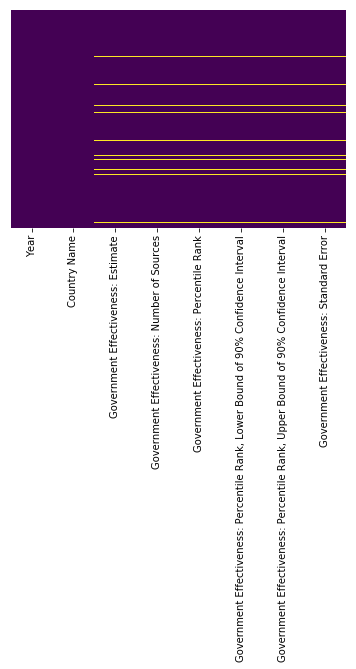

In [103]:
sns.heatmap(gov_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [104]:
gov_data.columns

Index(['Year', 'Country Name', 'Government Effectiveness: Estimate',
       'Government Effectiveness: Number of Sources',
       'Government Effectiveness: Percentile Rank',
       'Government Effectiveness: Percentile Rank, Lower Bound of 90% Confidence Interval',
       'Government Effectiveness: Percentile Rank, Upper Bound of 90% Confidence Interval',
       'Government Effectiveness: Standard Error'],
      dtype='object')

In [105]:
copy_gov = gov_data.copy()

In [106]:
copy_gov = copy_gov.rename(columns={'Government Effectiveness: Estimate': 'GE: Estimate',
                         'Government Effectiveness: Number of Sources': 'GE: Number of Sources',
                         'Government Effectiveness: Percentile Rank': 'GE: Percentile Rank',
                         'Government Effectiveness: Percentile Rank, Lower Bound of 90% Confidence Interval': 'GE: Lower Bound 90%',
                         'Government Effectiveness: Percentile Rank, Upper Bound of 90% Confidence Interval': 'GE: Upper Bound 90%',
                         'Government Effectiveness: Standard Error': 'GE: Standard Error'})

In [107]:
copy_gov.head()

,Year,Country Name,GE: Estimate,GE: Number of Sources,GE: Percentile Rank,GE: Lower Bound 90%,GE: Upper Bound 90%,GE: Standard Error
0,1996-01-01,Afghanistan,-2.175167,1.0,0.000000,0.000000,1.639344,0.187618
1,1998-01-01,Afghanistan,-2.135942,1.0,0.000000,0.000000,2.590674,0.310279
2,2000-01-01,Afghanistan,-2.231651,1.0,0.000000,0.000000,2.564103,0.343066
3,2002-01-01,Afghanistan,-1.567973,2.0,2.040816,0.000000,9.183674,0.262548
4,2003-01-01,Afghanistan,-1.082488,2.0,11.734694,1.530612,32.142857,0.306744


In [125]:
Africa_countries = ["Angola", "Gabon", "Nigeria", "Benin", "Gambia, The", "Rwanda", "Guinea-Bissau","Botswana", 
       "Ghana", "São Tomé and Principe", "Burkina Faso", "Guinea", "Senegal", "Burundi", "Seychelles", 
       "Cabo Verde", "Kenya", "Sierra Leone", "Cameroon", "Lesotho", "Somalia", "Central African Republic", 
       "Liberia", "South Africa", "Chad", "Madagascar", "Comoros", "Malawi", "Sudan", "Congo, Dem. Rep.", 
       "Mali", "Swaziland", "Congo, Rep", "Mauritania", "Tanzania", "Côte d'Ivoire", "Mauritius", "Togo", 
       "Equatorial Guinea", "Mozambique", "Uganda", "Eritrea" "Namibia", "Zambia", "Ethiopia", "Niger", "Zimbabwe"]
copy_gov = copy_gov[copy_gov['Country Name'].isin(Africa_countries)]

In [126]:
copy_gov.head()

,Year,Country Name,GE: Estimate,GE: Number of Sources,GE: Percentile Rank,GE: Lower Bound 90%,GE: Upper Bound 90%,GE: Standard Error
90,1996-01-01,Angola,-0.859940,3.0,21.311476,12.021858,33.333332,0.173904
91,1998-01-01,Angola,-1.341783,5.0,5.699482,2.590674,13.989637,0.203155
92,2000-01-01,Angola,-1.462310,5.0,3.589744,2.051282,10.256411,0.211237
93,2002-01-01,Angola,-1.238857,6.0,8.163265,2.040816,13.775510,0.186934
94,2003-01-01,Angola,-1.156531,7.0,9.183674,3.571429,18.877550,0.177603


In [198]:
def mean_estimate(df, country):
    df[df['Country Name'] == country].mean()
    return df

In [200]:
#mean_estimate(copy_gov, "Somalia")

In [193]:
holder = copy_gov[copy_gov['Country Name'] == 'Somalia'].mean()

In [201]:
holder

GE: Estimate            -2.140949
GE: Number of Sources    5.333333
GE: Percentile Rank      0.399803
GE: Lower Bound 90%      0.028345
GE: Upper Bound 90%      1.410370
GE: Standard Error       0.229954
dtype: float64

In [188]:
#mask = copy_gov['Country Name'] == "Somalia" 
copy_gov.groupby(lambda x: x != 'Somalia')['GE: Estimate'].sum()

True   -571.176463
Name: GE: Estimate, dtype: float64